In [123]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [171]:
path = 'test_20241206'
file = os.listdir(path)

# find a file where an intensity peak appears
max_val = []
for i in range(len(file)):
    df23_temp = pd.read_csv(path+'/'+file[i], index_col='Time')
    max_val.append(df23_temp.max(axis=1).max())
pd.Series(max_val)

0        19.0
1        25.0
2     12560.0
3     12358.0
4     59394.0
5     58654.0
6     57992.0
7     56926.0
8     57125.0
9     57060.0
10    56733.0
11    56700.0
12    56609.0
13    55358.0
14    55657.0
15    54430.0
16    54502.0
17    55937.0
18    55924.0
19    55784.0
20    55936.0
21    55146.0
22    55084.0
23    55606.0
24    54680.0
25    55726.0
26    55232.0
27    55413.0
28    55466.0
29    55490.0
30      168.0
31      136.0
32      129.0
33      705.0
34     1627.0
35      130.0
36      130.0
37      227.0
38      135.0
39      136.0
40      205.0
41      131.0
dtype: float64

The maximum intensity was doubled when transitioning from 3 to 4 when the integration time was so at around the beginning of the measurement. Concatenate file[2] and file[3] and check whether the spectrometer yields reasonable data. Note that file[34] shows an unexpected peak, though the process must have finished by that time.

In [172]:
df2 = pd.read_csv(path+'/'+file[2], index_col='Time')
df3 = pd.read_csv(path+'/'+file[3], index_col='Time')
print(df2.columns)
print(df3.columns)

Index(['49.751256', '50.252262', '50.753331', '51.254464', '51.755659',
       '52.256918', '52.758239', '53.259624', '53.761071', '54.262582',
       ...
       '1186.378766', '1186.985666', '1187.592607', '1188.199588',
       '1188.806610', '1189.413673', '1190.020777', '1190.627921',
       '1191.235106', '1191.842332'],
      dtype='object', length=2048)
Index(['49.750000', '50.250000', '50.750000', '51.250000', '51.760000',
       '52.260000', '52.760000', '53.260000', '53.760000', '54.260000',
       ...
       '1186.380000', '1186.990000', '1187.590000', '1188.200000',
       '1188.810000', '1189.410000', '1190.020000', '1190.630000',
       '1191.240000', '1191.840000'],
      dtype='object', length=2048)


Note that their column names do not match and therefore cannot be combined as they are.
To tackle this issue, apply the floor function to them

In [173]:
def DropFromSecond(x):
    x = x * 10
    x = np.floor(x)
    return x/10

DropFromSecond(3.16)

np.float64(3.1)

In [174]:
df2_new_cols = [str(DropFromSecond(x)) for x in df2.columns.astype(float)]
df2.columns = df2_new_cols
df3.columns = df2_new_cols # match their column names

# concatenate the two
df23 = pd.concat([df2, df3], ignore_index=True)
df23

,49.7,50.2,50.7,51.2,51.7,52.2,52.7,53.2,53.7,54.2,...,1186.3,1186.9,1187.5,1188.1,1188.8,1189.4,1190.0,1190.6,1191.2,1191.8
0,-1.0,5.0,1.0,9.0,4.0,9.0,3.0,-1.0,0.0,2.0,...,-9.0,1.0,-14.0,2.0,-4.0,-5.0,-4.0,-5.0,-4.0,-8.0
1,8.0,3.0,12.0,11.0,6.0,5.0,2.0,2.0,0.0,-1.0,...,-9.0,0.0,-6.0,3.0,-5.0,3.0,-6.0,-4.0,-10.0,-9.0
2,-6.0,8.0,-2.0,1.0,0.0,6.0,4.0,2.0,-2.0,0.0,...,-8.0,-6.0,-8.0,-11.0,-2.0,1.0,-9.0,-12.0,-18.0,-6.0
3,-1.0,1.0,16.0,1.0,-2.0,12.0,-3.0,0.0,0.0,-6.0,...,-7.0,-11.0,-13.0,-1.0,-5.0,7.0,-4.0,-3.0,-8.0,-4.0
4,0.0,-5.0,7.0,12.0,5.0,12.0,2.0,6.0,-4.0,2.0,...,-3.0,-8.0,-1.0,-1.0,-8.0,3.0,-2.0,-5.0,-12.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,1.0,8.0,4.0,8.0,3.0,0.0,2.0,0.0,0.0,0.0,...,-2.0,0.0,-2.0,-4.0,-8.0,6.0,-2.0,-16.0,-6.0,-7.0
318,0.0,-4.0,13.0,-5.0,6.0,11.0,0.0,-5.0,-3.0,-2.0,...,-7.0,-9.0,-2.0,-4.0,-1.0,-2.0,-8.0,-13.0,-4.0,-4.0
319,-1.0,-5.0,5.0,6.0,6.0,2.0,3.0,-2.0,-7.0,0.0,...,-7.0,-5.0,-13.0,-3.0,-1.0,2.0,-5.0,-9.0,-14.0,-4.0
320,-4.0,-1.0,16.0,10.0,1.0,7.0,0.0,-2.0,-3.0,-2.0,...,-2.0,-1.0,-9.0,-8.0,-7.0,6.0,-11.0,-7.0,-11.0,-6.0


In [175]:
df23.describe()

,49.7,50.2,50.7,51.2,51.7,52.2,52.7,53.2,53.7,54.2,...,1186.3,1186.9,1187.5,1188.1,1188.8,1189.4,1190.0,1190.6,1191.2,1191.8
count,322.000000,322.000000,322.000000,322.00000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,...,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000,322.000000
mean,0.409938,1.512422,5.649068,4.13354,4.450311,6.832298,0.282609,0.481366,-1.385093,-2.251553,...,-7.403727,-5.152174,-7.975155,-4.822981,-4.819876,2.562112,-5.400621,-8.437888,-8.375776,-5.453416
std,4.081677,4.081128,4.283324,4.33031,4.230031,3.969880,3.789345,3.897594,3.887935,3.812026,...,4.382604,3.916394,4.321143,4.324425,4.308780,4.626639,3.955091,4.229130,3.831144,4.050230
min,-13.000000,-10.000000,-6.000000,-9.00000,-11.000000,-4.000000,-9.000000,-11.000000,-14.000000,-16.000000,...,-20.000000,-17.000000,-20.000000,-17.000000,-19.000000,-14.000000,-16.000000,-19.000000,-18.000000,-16.000000
25%,-2.000000,-1.000000,2.250000,1.00000,2.000000,4.000000,-2.000000,-2.000000,-4.000000,-4.000000,...,-10.000000,-8.000000,-11.000000,-8.000000,-8.000000,-1.000000,-8.000000,-11.750000,-11.000000,-8.000000
50%,0.500000,1.000000,5.000000,4.00000,5.000000,7.000000,0.000000,0.000000,-2.000000,-2.000000,...,-7.000000,-5.000000,-8.000000,-5.000000,-5.000000,3.000000,-5.000000,-9.000000,-8.000000,-6.000000
75%,3.000000,5.000000,8.000000,6.75000,7.000000,10.000000,3.000000,3.000000,1.000000,0.000000,...,-4.000000,-2.000000,-5.000000,-2.000000,-2.000000,6.000000,-3.000000,-5.000000,-6.000000,-2.000000
max,14.000000,12.000000,17.000000,16.00000,15.000000,19.000000,11.000000,13.000000,12.000000,10.000000,...,4.000000,5.000000,4.000000,7.000000,6.000000,16.000000,7.000000,3.000000,2.000000,4.000000


In [176]:
df23.shape

(322, 2048)

In [177]:
x = range(len(df23.index))
y = range(len(df23.columns))

# replace negative values with zero
for i in range(len(df23.index)):
    for j in range(len(df23.columns)):
        if df23.iloc[i,j]<0:
            df23.iloc[i,j]=0

# scaling
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(np.array(df23.columns).reshape(-1, 1))
y = mm.transform(np.array(df23.columns).reshape(-1, 1)).flatten() * 1142 + 50

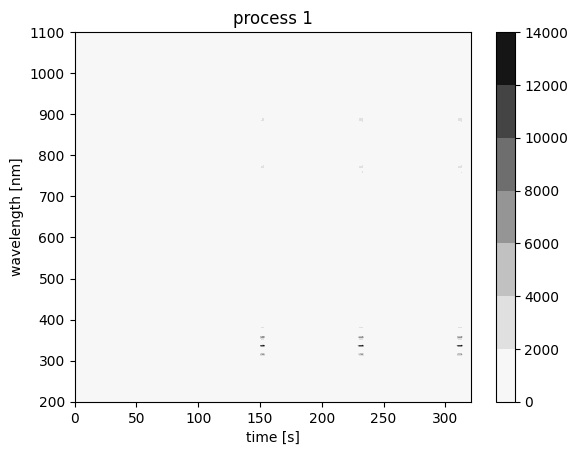

In [178]:
X, Y = np.meshgrid(x, y)
Z = df23.T
plt.contourf(X, Y, Z, cmap='Greys')
plt.xlabel('time [s]')
plt.ylabel('wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('process 1')
plt.colorbar()
plt.show()

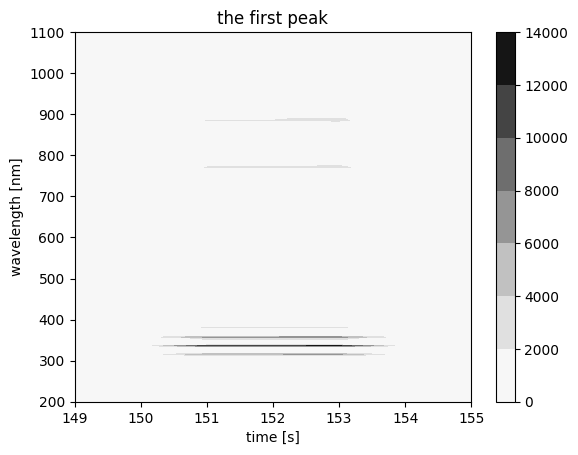

In [143]:
plt.contourf(X, Y, Z, cmap='Greys')
plt.xlabel('time [s]')
plt.xlim(149, 155)
# plt.xticks(range(145,156,2))
plt.ylabel('wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('the first peak')
plt.colorbar()
plt.show()

In [113]:
df23.columns = [str(i) for i in df23.columns]

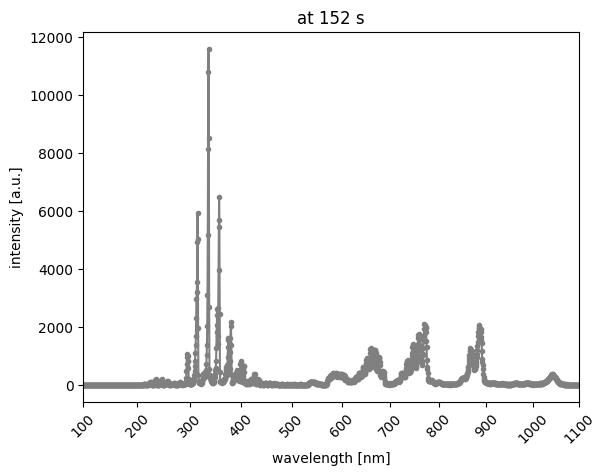

the peak appears at  ['336.6'] nm


In [148]:
# to find numbers close to 100, 200, ..., 1100
cst_xticks = []
target = 100
for elem in df23.columns:
    if int(elem.split('.')[0]) == target:
        cst_xticks.append(elem)
        target += 100
cst_xticks

plt.plot(df23.iloc[152,:],'.-',color='grey')
plt.xlim(200,1100)
plt.xlabel('wavelength [nm]')
plt.xticks(cst_xticks, labels=[int(float(x)) for x in cst_xticks], rotation = 45)
plt.ylabel('intensity [a.u.]')
plt.title('at 152 s')
plt.show()

# peak wavelength
value = df23.iloc[152,:].max()
print('the peak appears at ', df23.columns[df23.isin([value]).any()].tolist(), 'nm')

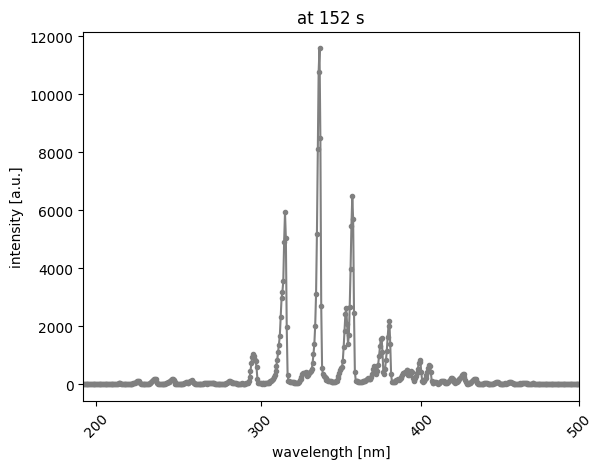

In [149]:
plt.plot(df23.iloc[152,:],'.-',color='grey')
plt.xlabel('wavelength [nm]')
plt.xlim(280,420)
plt.xticks(cst_xticks[1:5], labels=[int(float(x)) for x in cst_xticks[1:5]], rotation = 45)
plt.ylabel('intensity [a.u.]')
plt.title('at 152 s')
plt.show()

Considering the resolution of the spectrometer, track down the precursors N2 (337nm) and NH3 (201.1, 204.6, or 791.9 nm)

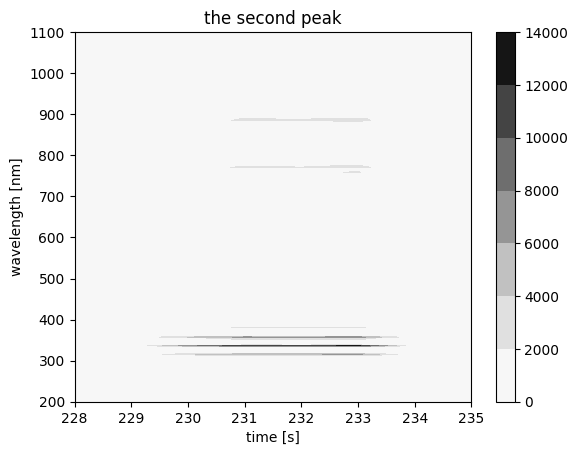

In [146]:
# the second reaction
plt.contourf(X, Y, Z, cmap='Greys')
plt.xlabel('time [s]')
plt.xlim(228, 235)
# plt.xticks(range(145,156,2))
plt.ylabel('wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('the second peak')
plt.colorbar()
plt.show()

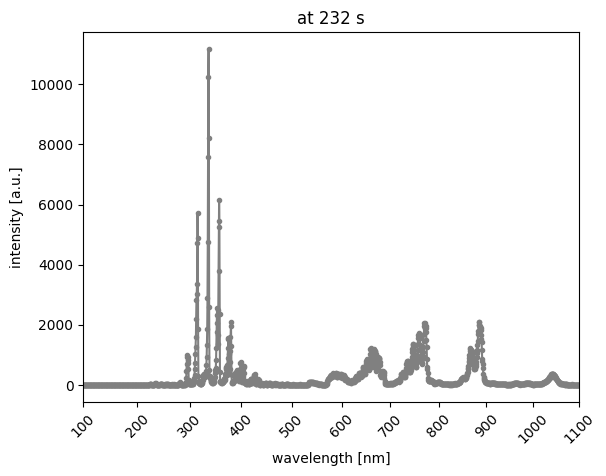

the peak appears at  ['336.6'] nm


In [150]:
plt.plot(df23.iloc[232,:],'.-',color='grey')
plt.xlim(200,1100)
plt.xlabel('wavelength [nm]')
plt.xticks(cst_xticks, labels=[int(float(x)) for x in cst_xticks], rotation = 45)
plt.ylabel('intensity [a.u.]')
plt.title('at 232 s')
plt.show()

# peak wavelength
value = df23.iloc[232,:].max()
print('the peak appears at ', df23.columns[df23.isin([value]).any()].tolist(), 'nm')

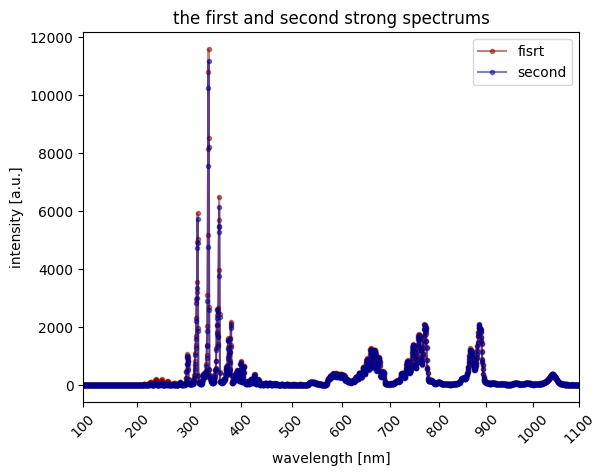

In [167]:
# are they overlapped?
plt.plot(df23.iloc[152,:],'.-',color='darkred', alpha=0.5)
plt.plot(df23.iloc[232,:],'.-',color='darkblue', alpha=0.5)

plt.xlim(200,1100)
plt.xticks(cst_xticks, labels=[int(float(x)) for x in cst_xticks], rotation = 45)
plt.xlabel('wavelength [nm]')
plt.ylabel('intensity [a.u.]')
plt.legend(['fisrt', 'second'])
plt.title('the first and second strong spectrums')
plt.show()

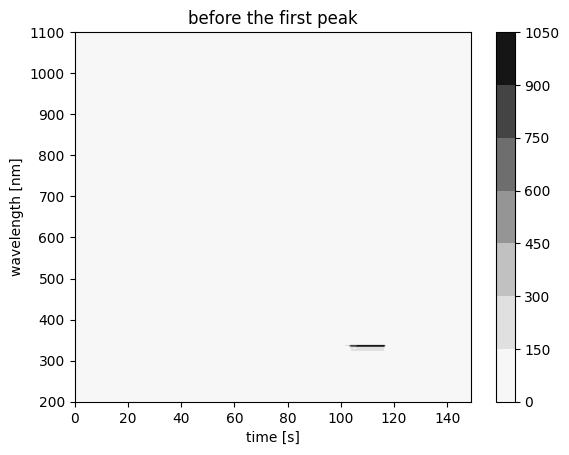

In [153]:
#### anything happend before the time step 152?
df23_short = df23.iloc[:150,:]

x = range(len(df23_short.index))
y = range(len(df23_short.columns))

# replace negative values with zero
for i in x:
    for j in y:
        if df23_short.iloc[i,j]<0:
            df23_short.iloc[i,j]=0

# scaling
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(np.array(df23.columns).reshape(-1, 1))
y = mm.transform(np.array(df23.columns).reshape(-1, 1)).flatten() * 1142 + 50

X, Y = np.meshgrid(x, y)
Z = df23_short.T

plt.contourf(X, Y, Z, cmap='Greys')
plt.xlabel('time [s]')
# plt.xlim(0, 150)
# plt.xticks(range(145,156,2))
plt.ylabel('wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('before the first peak')
plt.colorbar()
plt.show()

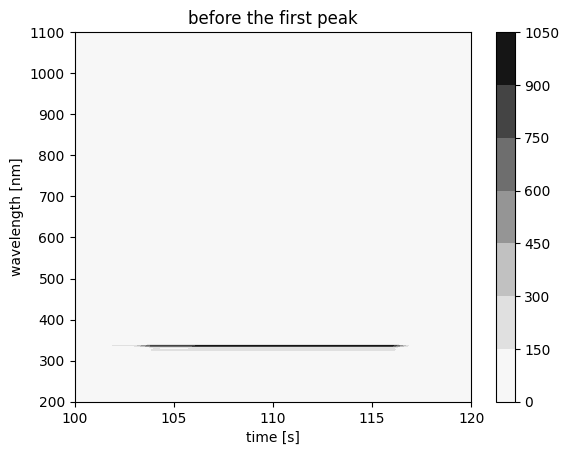

In [154]:
plt.contourf(X, Y, Z, cmap='Greys')
plt.xlabel('time [s]')
plt.xlim(100, 120)
plt.xticks(range(100,121,5))
plt.ylabel('wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('before the first peak')
plt.colorbar()
plt.show()

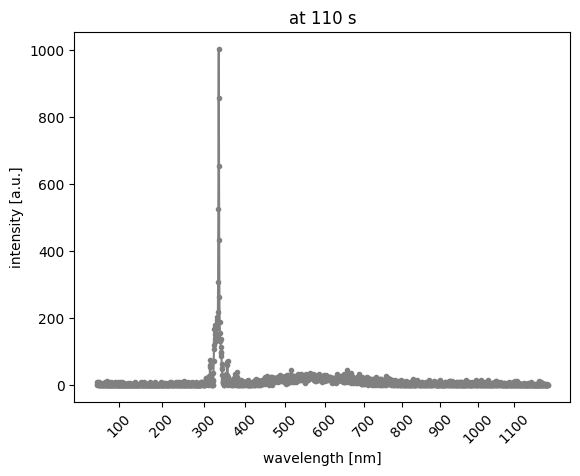

the peak appears at  ['336.1'] nm


In [158]:
# corresponding spectrum
plt.plot(df23_short.iloc[110,:],'.-',color='grey')
# plt.xlim(200,1100)
plt.xlabel('wavelength [nm]')
plt.xticks(cst_xticks, labels=[int(float(x)) for x in cst_xticks], rotation = 45)
plt.ylabel('intensity [a.u.]')
plt.title('at 110 s')
plt.show()

# peak wavelength
value = df23_short.iloc[110,:].max()
print('the peak appears at ', df23_short.columns[df23_short.isin([value]).any()].tolist(), 'nm')

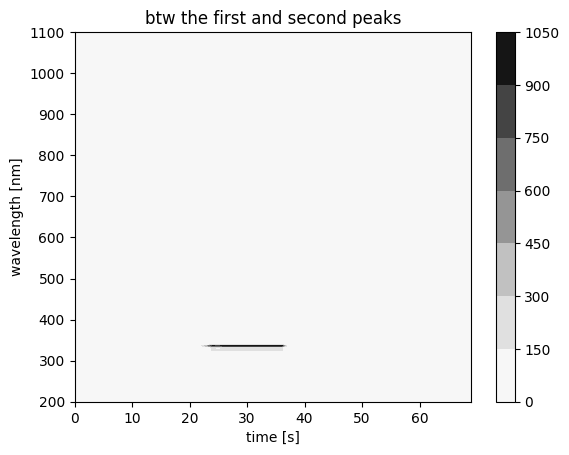

In [165]:
# droulbe check 
df23_short = df23.iloc[160:230,:]

x = range(len(df23_short.index))
y = range(len(df23_short.columns))

# replace negative values with zero
for i in x:
    for j in y:
        if df23_short.iloc[i,j]<0:
            df23_short.iloc[i,j]=0

# scaling
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(np.array(df23.columns).reshape(-1, 1))
y = mm.transform(np.array(df23.columns).reshape(-1, 1)).flatten() * 1142 + 50

X, Y = np.meshgrid(x, y)
Z = df23_short.T

plt.contourf(X, Y, Z, cmap='Greys')
plt.xlabel('time [s]')
# plt.xlim(0, 150)
# plt.xticks(range(145,156,2))
plt.ylabel('wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('btw the first and second peaks')
plt.colorbar()
plt.show()

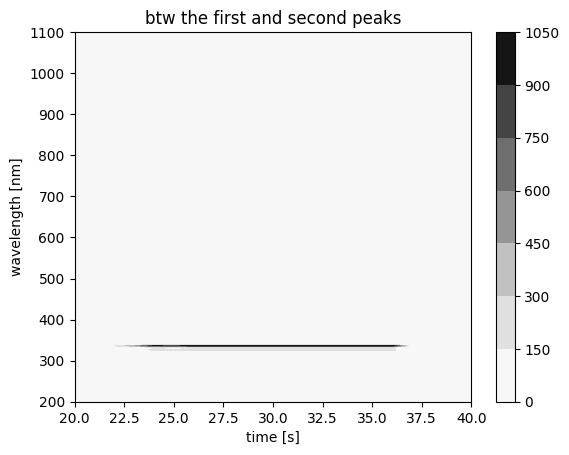

In [160]:
plt.contourf(X, Y, Z, cmap='Greys')
plt.xlabel('time [s]')
plt.xlim(20, 40)
# plt.xticks(range(145,156,2))
plt.ylabel('wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('btw the first and second peaks')
plt.colorbar()
plt.show()

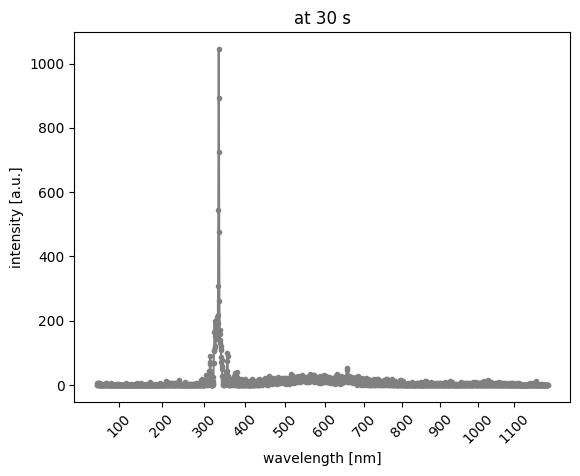

the peak appears at  ['336.1'] nm


In [162]:
# at 30 s
# corresponding spectrum
plt.plot(df23_short.iloc[30,:],'.-',color='grey')
# plt.xlim(200,1100)
plt.xlabel('wavelength [nm]')
plt.xticks(cst_xticks, labels=[int(float(x)) for x in cst_xticks], rotation = 45)
plt.ylabel('intensity [a.u.]')
plt.title('at 30 s')
plt.show()

# peak wavelength
value = df23_short.iloc[30,:].max()
print('the peak appears at ', df23_short.columns[df23_short.isin([value]).any()].tolist(), 'nm')

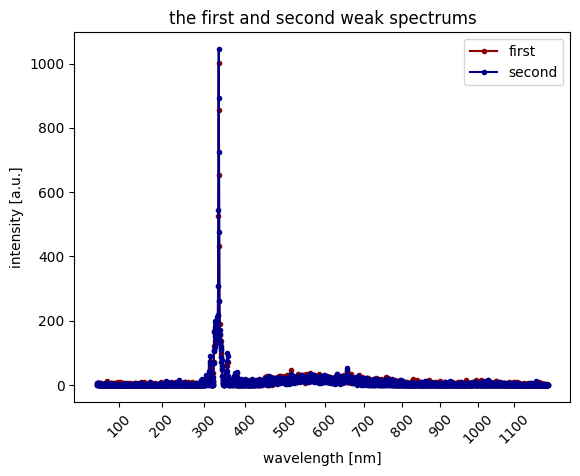

In [168]:
# plot together
# first
df23_short = df23.iloc[:150,:]

x = range(len(df23_short.index))
y = range(len(df23_short.columns))

# replace negative values with zero
for i in x:
    for j in y:
        if df23_short.iloc[i,j]<0:
            df23_short.iloc[i,j]=0

# corresponding spectrum
plt.plot(df23_short.iloc[110,:],'.-',color='darkred')

# droulbe check 
df23_short = df23.iloc[160:230,:]

x = range(len(df23_short.index))
y = range(len(df23_short.columns))

# replace negative values with zero
for i in x:
    for j in y:
        if df23_short.iloc[i,j]<0:
            df23_short.iloc[i,j]=0

# at 30 s
# corresponding spectrum
plt.plot(df23_short.iloc[30,:],'.-',color='darkblue')
# plt.xlim(200,1100)
plt.xlabel('wavelength [nm]')
plt.xticks(cst_xticks, labels=[int(float(x)) for x in cst_xticks], rotation = 45)
plt.ylabel('intensity [a.u.]')
plt.legend(['first', 'second'])
plt.title('the first and second weak spectrums')
plt.show()

In [47]:
# narrow our focus on a certain wavelength
def GetWaveRange(df, target):
    w_range = []
    for elem in df.columns:
        if int(elem.split('.')[0]) > target:
            if len(w_range) < 5:
                w_range.append(elem)
            else:
                break;
    return w_range

# N2
print('prospective range of N2 : ', GetWaveRange(df23, 335))

# NH3
print('prospective range of NH3_201,204 : ', GetWaveRange(df23, 200))
print('prospective range of NH3_201,204 : ', GetWaveRange(df23, 202))
print('prospective range of NH3_791 : ', GetWaveRange(df23, 789))

prospective range of N2 :  ['336.1', '336.6', '337.2', '337.7', '338.2']
prospective range of NH3_201,204 :  ['201.2', '201.7', '202.3', '202.8', '203.3']
prospective range of NH3_201,204 :  ['203.3', '203.8', '204.3', '204.9', '205.4']
prospective range of NH3_791 :  ['790.0', '790.6', '791.2', '791.7', '792.3']


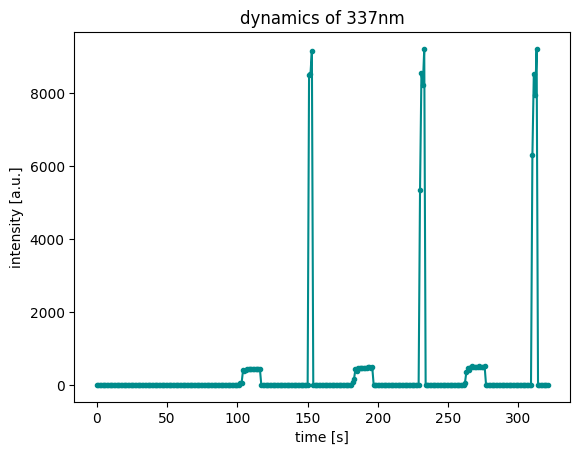

In [163]:
# extact the column '336.667651'
w_337 = df23.loc[:,'337.2']
plt.plot(w_337, '.-',color='darkcyan')
plt.xlabel('time [s]')
plt.ylabel('intensity [a.u.]')
plt.title('dynamics of 337nm')
plt.show()

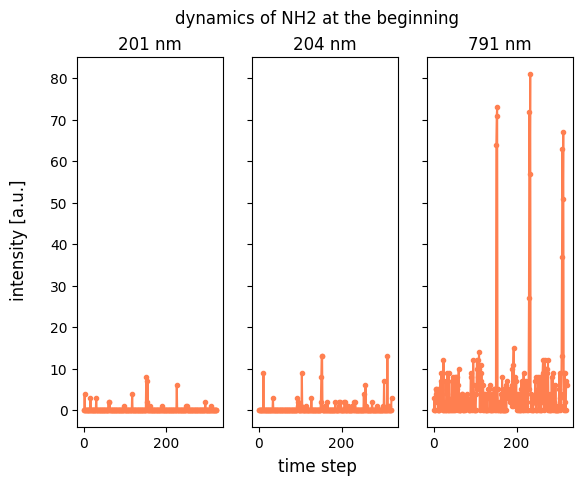

In [49]:
fig, axs = plt.subplots(1,3, sharex=True, sharey=True)

w_201 = df23.loc[:,'201.7']
axs[0].plot(w_201, '.-',color='coral')
axs[0].set_title('201 nm')

w_204 = df23.loc[:,'204.3']
axs[1].plot(w_204, '.-',color='coral')
axs[1].set_title('204 nm')

w_791 = df23.loc[:,'791.7']
axs[2].plot(w_791, '.-',color='coral')
axs[2].set_title('791 nm')

fig.supxlabel('time step')
fig.supylabel('intensity [a.u.]')
fig.suptitle('dynamics of NH2 at the beginning')
plt.show()

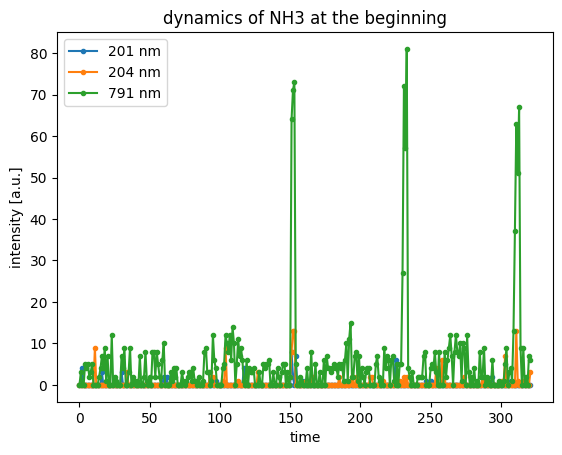

In [50]:
# or in one plot
plt.plot(w_201, '.-')
plt.plot(w_204, '.-')
plt.plot(w_791, '.-')
plt.xlabel('time')
plt.ylabel('intensity [a.u.]')
plt.legend(['201 nm','204 nm', '791 nm'], loc='upper left')
plt.title('dynamics of NH3 at the beginning')
plt.show()

From this, we could conclude that the the very NH3 used as a precursor is characterized by 791 nm. However, the intensity is much lower than that of N2..
What is the lower peak at time step ~ 110 by the way?

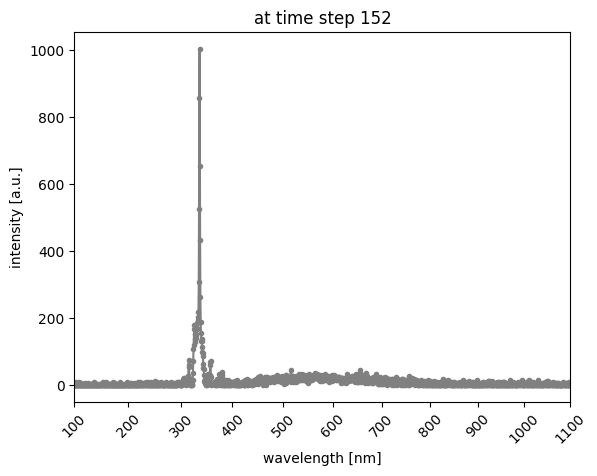

the peak appears at  ['336.6'] nm


In [51]:
plt.plot(df23.iloc[110,:],'.-',color='grey')
plt.xlim(200,1100)
plt.xlabel('wavelength [nm]')
plt.xticks(cst_xticks, labels=[int(float(x)) for x in cst_xticks], rotation = 45)
plt.ylabel('intensity [a.u.]')
plt.title('at time step 152')
plt.show()

# peak wavelength
value = df23.iloc[152,:].max()
print('the peak appears at ', df23.columns[df23.isin([value]).any()].tolist(), 'nm')

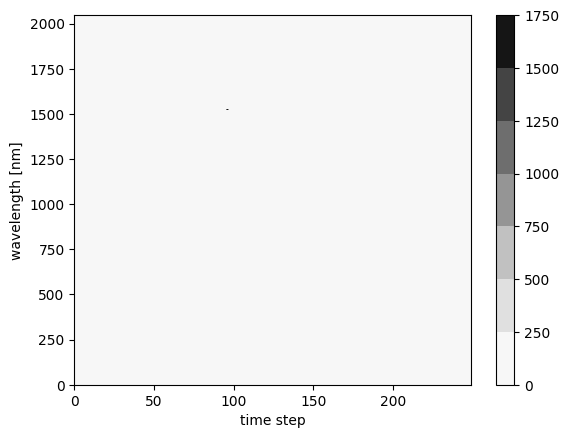

In [52]:
# the suspicious 34
df34 = pd.read_csv(path+'/'+file[34], index_col='Time')

x = range(len(df34.index))
y = range(len(df34.columns))

# replace negative values with zero
for i in x:
    for j in y:
        if df34.iloc[i,j]<0:
            df34.iloc[i,j]=0
            
X, Y = np.meshgrid(x, y)
Z = df34.T

plt.contourf(X, Y, Z, cmap='Greys')
plt.xlabel('time step')
plt.ylabel('wavelength [nm]')
# plt.ylim(200,1100) # OES measurable spectral range
plt.colorbar()
plt.show()

In [53]:
df34.iloc[100,:].argmax()

np.int64(1721)

In [54]:
df34.columns

Index(['49.750000', '50.250000', '50.750000', '51.250000', '51.760000',
       '52.260000', '52.760000', '53.260000', '53.760000', '54.260000',
       ...
       '1186.380000', '1186.990000', '1187.590000', '1188.200000',
       '1188.810000', '1189.410000', '1190.020000', '1190.630000',
       '1191.240000', '1191.840000'],
      dtype='object', length=2048)

In [55]:
GetWaveRange(df34, 1719) ####

[]

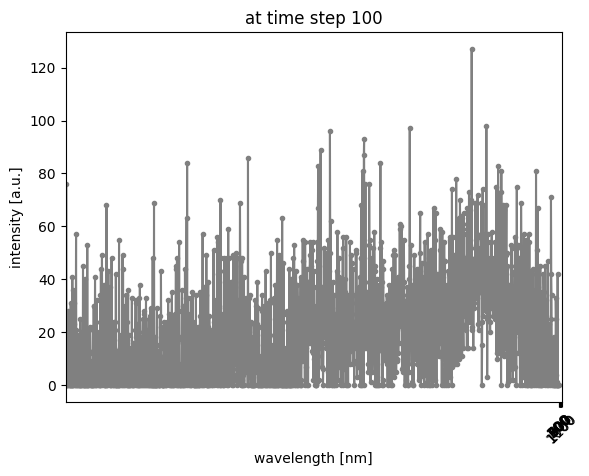

the peak appears at  ['996.110000', '1028.810000'] nm


In [57]:
plt.plot(df34.iloc[100,:],'.-',color='grey')
plt.xlim(200,1100)
plt.xlabel('wavelength [nm]')
plt.xticks(cst_xticks, labels=[int(float(x)) for x in cst_xticks], rotation = 45)
plt.ylabel('intensity [a.u.]')
plt.title('at time step 100')
plt.show()

# peak wavelength
value = df34.iloc[100,:].max()
print('the peak appears at ', df34.columns[df34.isin([value]).any()].tolist(), 'nm')

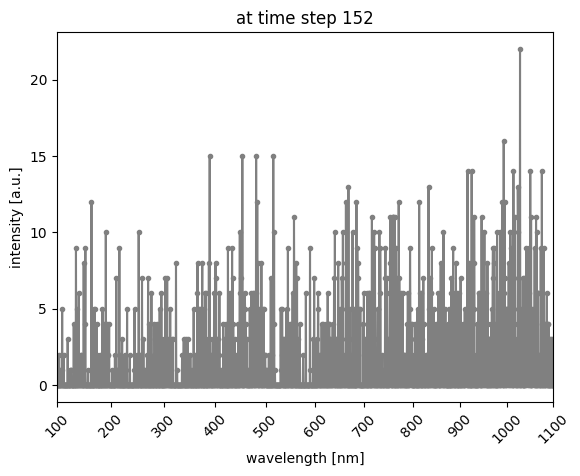

the peak appears at  ['52.2', '171.2', '212.1', '214.7', '219.4', '220.5', '228.3', '230.4', '231.4', '238.2', '242.4', '243.0', '248.7', '249.2', '252.9', '253.4', '256.6', '261.3', '261.9', '262.4', '269.8', '272.9', '291.4', '295.6', '300.4', '303.6', '304.1', '305.2', '305.7', '307.3', '308.4', '311.6', '312.6', '322.7', '324.3', '328.1', '345.7', '352.1', '353.7', '354.3', '357.0', '358.0', '366.1', '369.3', '370.4', '373.1', '373.6', '374.2', '374.7', '375.8', '378.5', '379.0', '379.5', '380.1', '380.6', '387.1', '390.9', '417.4', '417.9', '422.3', '426.6', '429.9', '432.1', '433.7', '436.4', '437.5', '444.6', '445.1', '446.2', '446.8', '449.0', '449.5', '450.1', '450.6', '451.1', '451.7', '452.2', '452.8', '453.9', '455.0', '456.1', '458.8', '459.9', '460.4', '462.1', '463.7', '464.3', '464.8', '465.9', '467.0', '467.6', '468.7', '469.7', '470.3', '470.8', '471.4', '471.9', '473.0', '474.1', '474.7', '475.8', '476.9', '477.4', '478.5', '479.1', '479.6', '480.2', '480.7', '481.3'

In [21]:
plt.plot(df23.iloc[110,:],'.-',color='grey')
plt.xlim(200,1100)
plt.xlabel('wavelength [nm]')
plt.xticks(cst_xticks, labels=[int(float(x)) for x in cst_xticks], rotation = 45)
plt.ylabel('intensity [a.u.]')
plt.title('at time step 152')
plt.show()

# peak wavelength
value = df23.iloc[152,:].max()
print('the peak appears at ', df23.columns[df23.isin([value]).any()].tolist(), 'nm')

In [181]:
# the rest of process; 4 to 29
# combine 13 of them and thereby make two long plots
df_rest1 = []
df_rest2 = []

for i in range(4,17):
    df_rest1.append(pd.read_csv(path+'/'+file[i], index_col='Time'))
for j in range(17,30):
    df_rest2.append(pd.read_csv(path+'/'+file[j], index_col='Time'))

# match columns
for i in range(len(df_rest1)-1):
    df_rest1[i+1].columns = df_rest1[0].columns
for j in range(len(df_rest2)-1):
    df_rest2[j+1].columns = df_rest2[0].columns

# merge
df1 = pd.concat(df_rest1, ignore_index=True)
df2 = pd.concat(df_rest2, ignore_index=True)

print(len(df_rest1), len(df_rest2))
print(df1.shape, df2.shape)

13 13
(3248, 2048) (3250, 2048)


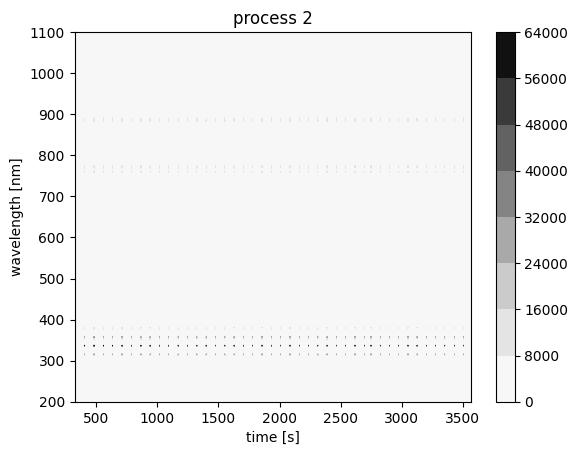

In [182]:
# first plot
x = range(322,322+len(df1.index))
y = range(len(df1.columns))

# replace negative values with zero
for i in range(len(df1.index)):
    for j in y:
        if df1.iloc[i,j]<0:
            df1.iloc[i,j]=0
            
# scaling
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(np.array(df23.columns).reshape(-1, 1))
y = mm.transform(np.array(df23.columns).reshape(-1, 1)).flatten() * 1142 + 50

X, Y = np.meshgrid(x, y)
Z = df1.T

plt.contourf(X, Y, Z, cmap='Greys')
plt.xlabel('time [s]')
plt.ylabel('wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('process 2')
plt.colorbar()
plt.show()

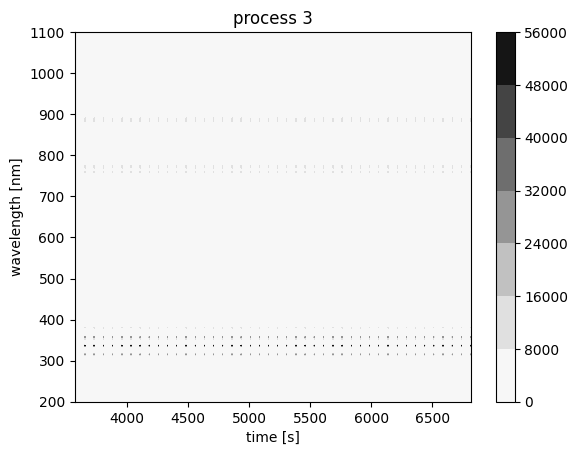

In [183]:
# second plot
x = range(3570,3570+len(df2.index))
y = range(len(df2.columns))

# replace negative values with zero
for i in range(len(df2.index)):
    for j in y:
        if df2.iloc[i,j]<0:
            df2.iloc[i,j]=0
            
# scaling
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
mm.fit(np.array(df23.columns).reshape(-1, 1))
y = mm.transform(np.array(df23.columns).reshape(-1, 1)).flatten() * 1142 + 50

X, Y = np.meshgrid(x, y)
Z = df2.T

plt.contourf(X, Y, Z, cmap='Greys')
plt.xlabel('time [s]')
plt.ylabel('wavelength [nm]')
plt.ylim(200,1100) # OES measurable spectral range
plt.title('process 3')
plt.colorbar()
plt.show()